In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


file_path = '/content/sample_data/OnlineRetail.csv'
data = pd.read_csv(file_path, encoding= 'unicode_escape')
print(data.head())

  InvoiceNo StockCode                     Description  Quantity   InvoiceDate  \
0    536369     21756        BATH BUILDING BLOCK WORD         3  12/1/10 8:35   
1    536368     22960        JAM MAKING SET WITH JARS         6  12/1/10 8:34   
2    536370     21883                STARS GIFT TAPE         24  10/1/10 8:45   
3    536370     21913  VINTAGE SEASIDE JIGSAW PUZZLES        12  12/1/10 8:45   
4    536367     48187             DOORMAT NEW ENGLAND         4  12/1/10 8:34   

   UnitSalePrice  CustomerID         Country StoreCode  UnitPricePurchase  
0           5.95       13047  United Kingdom    STR001               2.25  
1           4.25       13047  United Kingdom    STR022               1.35  
2           0.65       12583          France    STR031               1.75  
3           3.75       12583          France    STR042               5.95  
4           7.95       13047  United Kingdom    STR021               0.15  


# New Section

In [65]:
print("Dataset shape:", data.shape)
# Check the column data types and missing values
print(data.info())

# Handling missing values
data.dropna(inplace=True)

# Removing duplicate records
data.drop_duplicates(inplace=True)

# Standardizing formats
data['InvoiceNo'] = data['InvoiceNo'].astype(str)
data['CustomerID'] = data['CustomerID'].astype(int)
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Check the unique values in each column
for column in data.columns:
    unique_values = data[column].nunique()
    print(f"Unique values in {column}: {unique_values}")

Dataset shape: (499, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          499 non-null    object 
 1   StockCode          499 non-null    object 
 2   Description        499 non-null    object 
 3   Quantity           499 non-null    int64  
 4   InvoiceDate        499 non-null    object 
 5   UnitSalePrice      499 non-null    float64
 6   CustomerID         499 non-null    int64  
 7   Country            499 non-null    object 
 8   StoreCode          499 non-null    object 
 9   UnitPricePurchase  499 non-null    float64
dtypes: float64(2), int64(2), object(6)
memory usage: 39.1+ KB
None
Unique values in InvoiceNo: 45
Unique values in StockCode: 338
Unique values in Description: 339
Unique values in Quantity: 35
Unique values in InvoiceDate: 54
Unique values in UnitSalePrice: 55
Unique values in CustomerID: 31

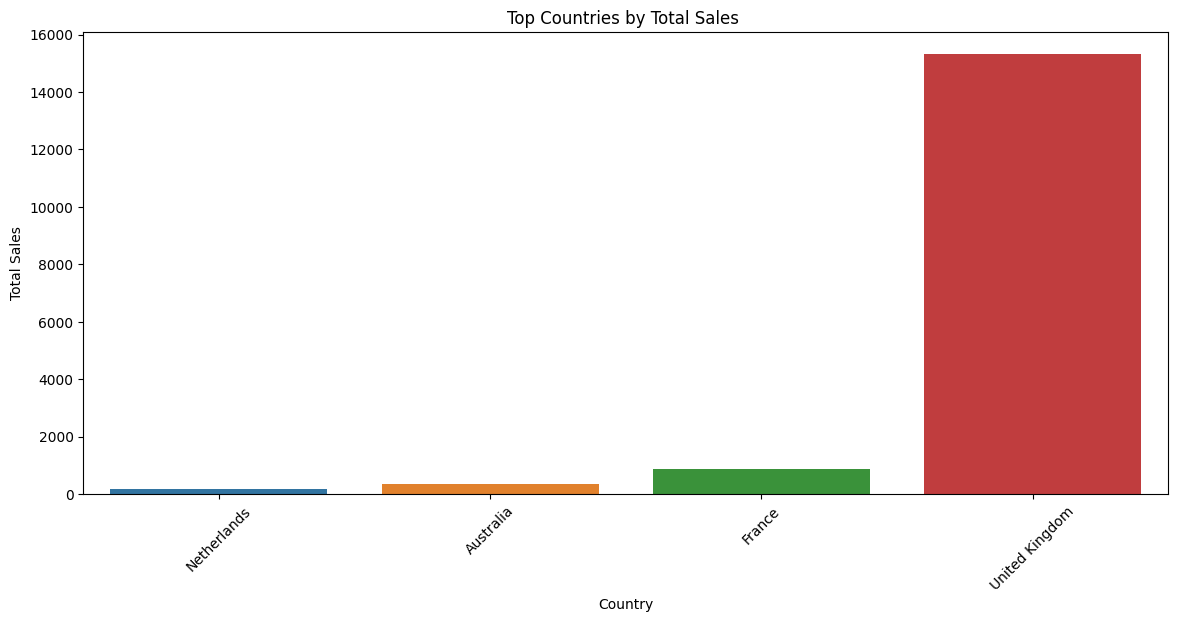

In [66]:
# Calculate the total sales
data['TotalSales'] = data['Quantity'] * data['UnitSalePrice']

# Visualize the top countries by total sales without UK
top_countries = data.groupby('Country')['TotalSales'].sum().sort_values(ascending=True)
plt.figure(figsize=(14, 6))
#print(top_countries)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top Countries by Total Sales ')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()




In [67]:
#print(data.head())

MonthYear
2010-08      483.13
2010-09      325.09
2010-10      110.10
2010-11      140.55
2010-12    15668.64
Freq: M, Name: TotalSales, dtype: float64


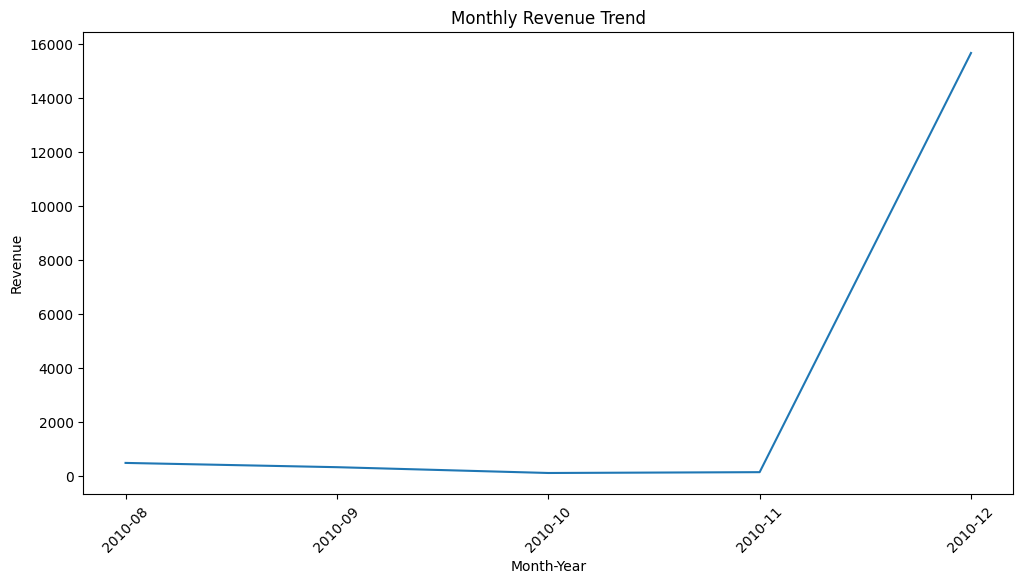

In [68]:
# Extract month and year from 'InvoiceDate' column
data['MonthYear'] = data['InvoiceDate'].dt.to_period('M')

#data['MonthYear']

# Calculate the monthly revenue
monthly_revenue = data.groupby('MonthYear')['TotalSales'].sum()

print(monthly_revenue)


# Visualize the monthly revenue trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_revenue.index.astype(str), y=monthly_revenue.values)
plt.title('Monthly Revenue Trend')
plt.xlabel('Month-Year')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()





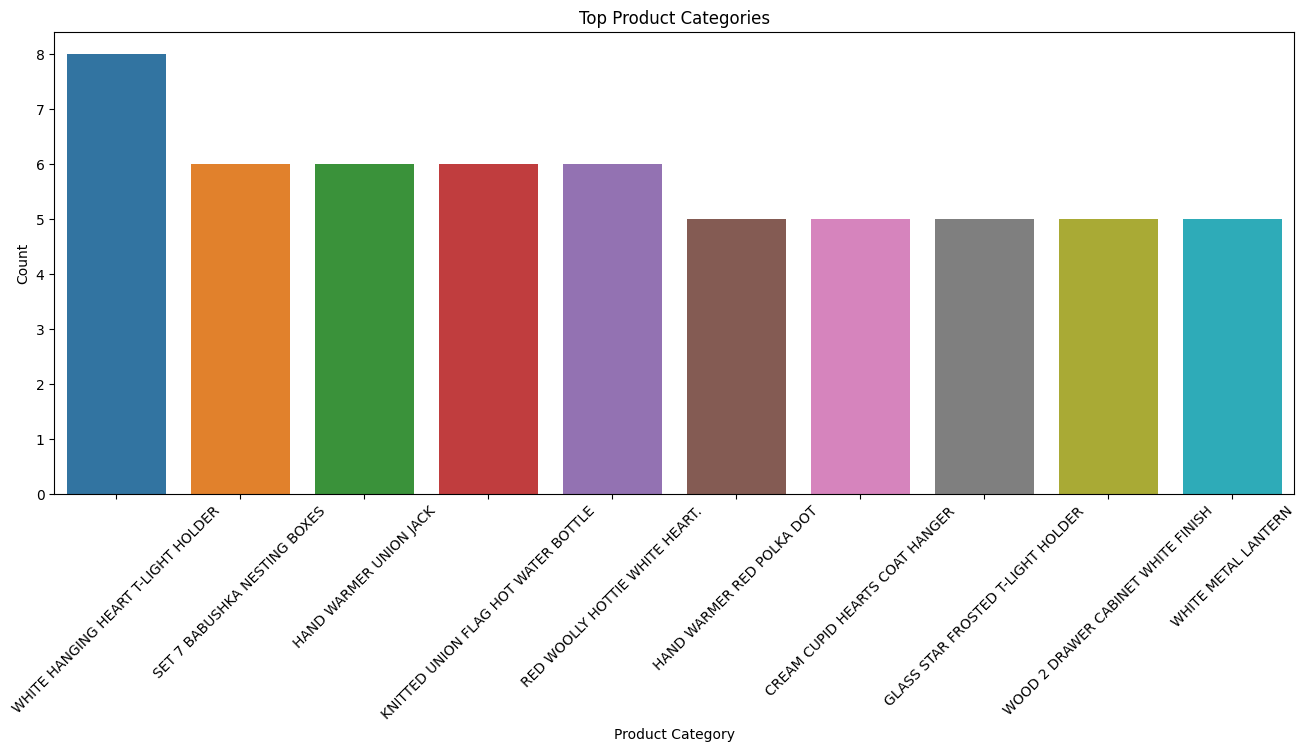

In [69]:
# Visualize the product categories
top_categories = data['Description'].value_counts().head(10)
plt.figure(figsize=(16, 6))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title('Top Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='Description'>

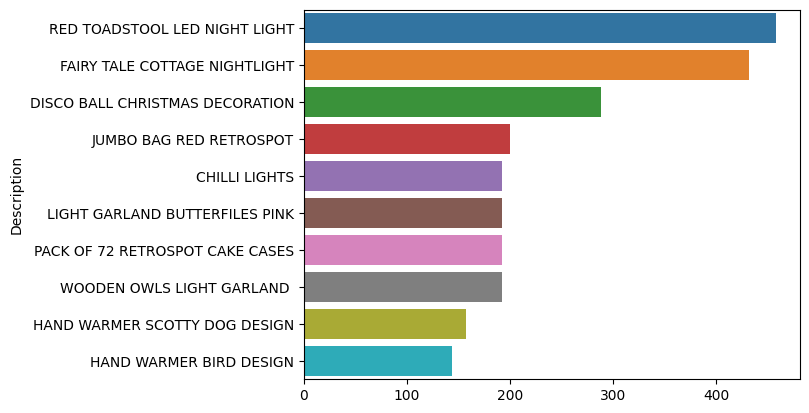

In [70]:
# Visualize the top selling products
top_products = data.groupby('Description')['Quantity'].sum().nlargest(10)
sns.barplot(x=top_products.values, y=top_products.index)

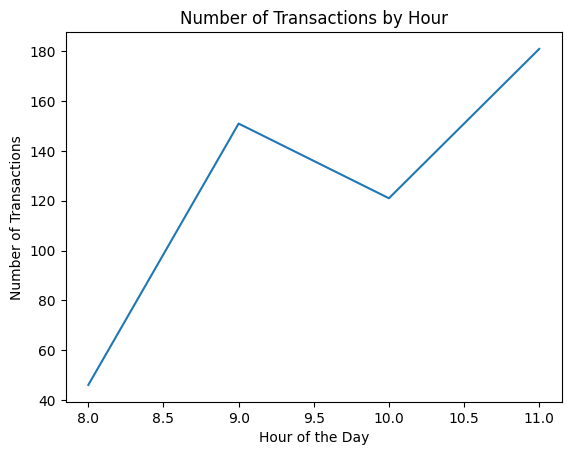

In [71]:
# Visualize transaction count per depending on the hour of day
data['Hour'] = data['InvoiceDate'].dt.hour
transactions_by_hour = data.groupby('Hour')['InvoiceNo'].count()
plt.plot(transactions_by_hour.index, transactions_by_hour.values)

plt.title('Number of Transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.show()

In [72]:
#Converting the type of Invoice Date Field from string to datetime

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [73]:
def f(x):

    if x.year == 2010:

        return True
    data = data[data['InvoiceDate'].map(f)]





In [74]:
transformed_data = data

In [75]:
#Creating a series with day numbers
day_numbers = pd.Series(range(len(data)))

invoice_date = pd.Series(data['InvoiceDate'])

month_number = invoice_date.iloc[0].month

last_month_day = 0


for i in range(len(data)):

    if invoice_date.iloc[i].month == month_number:

        day_numbers[i] = invoice_date.iloc[i].day + last_month_day

    else:

        month_number = invoice_date.iloc[i].month

        last_month_day = day_numbers[i-1]

        day_numbers[i] = invoice_date.iloc[i].day + last_month_day

In [76]:

#Creating a series with week numbers from 2010-09 to 2010-12
week_number = 1

days_in_a_week = 7

next_week_day = day_numbers[0] + days_in_a_week

week_numbers = pd.Series(range(len(data)))


for i in range(len(data)):

    if day_numbers[i] < next_week_day:

        week_numbers[i] = week_number

    else:

        next_week_day = next_week_day + days_in_a_week

        week_number = week_number + 1

        week_numbers[i] = week_number

In [77]:
#Calculating Weekly active users and visualizing the metric

data.index = range(len(data))

data['WeekNo'] = week_numbers

Text(0.5, 0, 'weeks')

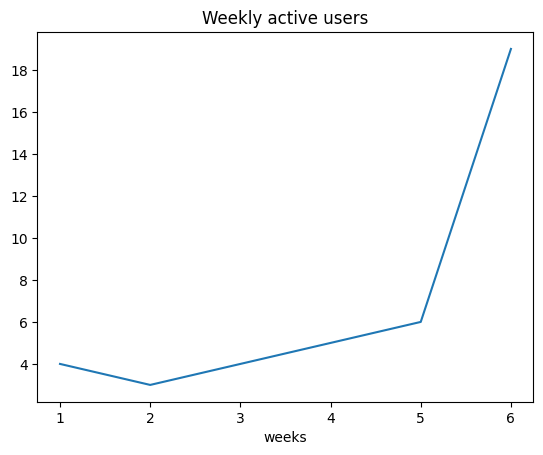

In [78]:
grouped = data['CustomerID'].groupby(data['WeekNo'])

WAB = grouped.apply(lambda x: pd.Series(x.unique()).count())

WAB.name = 'WAB'

WAB.index.name = ''


fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)

ax.plot(WAB.index, WAB)

ax.set_title('Weekly active users')

ax.set_xlabel('weeks')


In [79]:
data_with_weeks = data

Text(0.5, 0, 'weeks')

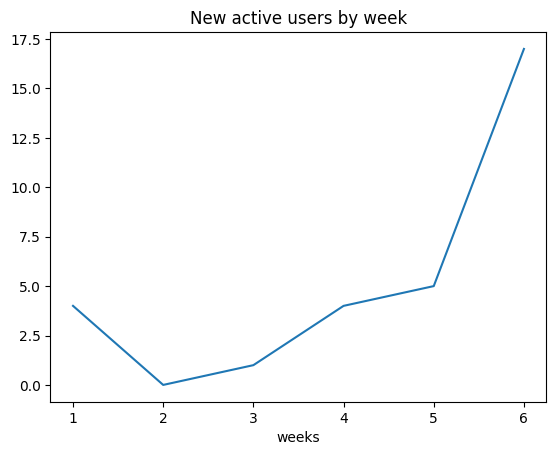

In [80]:
#Computing the count of new active buyers per week


grouped = data['CustomerID'].groupby(data['WeekNo'])

unique_by_week = grouped.apply(lambda x: pd.Series(x.unique()))



number_of_weeks = data['WeekNo'].max()

ex_act_buyers = []

new_act_buyers_by_week = pd.Series(range(number_of_weeks))

new_act_buyers_by_week.index = new_act_buyers_by_week.index + 1

new_act_buyers = 0


for i in range(number_of_weeks):

    for j in range(len(unique_by_week.loc[i+1])):

        if unique_by_week.loc[i+1,j] not in ex_act_buyers:

            new_act_buyers = new_act_buyers + 1

            ex_act_buyers.append(unique_by_week.loc[i+1,j])

    new_act_buyers_by_week.iloc[i] = new_act_buyers

    new_act_buyers = 0



fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)

ax.plot(new_act_buyers_by_week.index, new_act_buyers_by_week)

ax.set_title('New active users by week')

ax.set_xlabel('weeks')



In [81]:
#Creating new feature Revenue
data["Revenue"] = data["Quantity"] * data["UnitSalePrice"]
#Creating Features for RFM Model
#Changing data type to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [82]:
print("Max date :",data["InvoiceDate"].max())
print("Min date :",data["InvoiceDate"].min())


from pandas._libs.tslibs.vectorized import dt64arr_to_periodarr
import datetime as dt
#Set Latest date 2011-12-10 as last invoice date is 2011-12-09.
Latest_Date = dt.datetime(2011,12,10)

print(Latest_Date)





Max date : 2010-12-01 11:45:00
Min date : 2010-08-01 08:26:00
2011-12-10 00:00:00


In [83]:
#Recency refers to how recent a customer's last purchase was
#How often do customers purchase
#How much do customers spend

#Creating RFM features with subset of customerID
RFM = data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days,
                                                 'InvoiceNo': lambda x: x.nunique(),
                                                 "Revenue": lambda x: x.sum()})

RFM['InvoiceDate'] = RFM['InvoiceDate'].astype(int)

#Renaming column names to Recency, Frequency and Monetary
RFM.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'Revenue': 'Monetary'}, inplace=True)

RFM.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12431,373,1,358.25
1,12583,373,1,855.86
2,12791,373,1,192.60
3,13047,373,3,366.63
4,13408,373,1,1024.68


In [84]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitSalePrice,CustomerID,Country,StoreCode,UnitPricePurchase,TotalSales,MonthYear,Hour,WeekNo,Revenue
0,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047,United Kingdom,STR001,2.25,17.85,2010-12,8,1,17.85
1,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047,United Kingdom,STR022,1.35,25.50,2010-12,8,1,25.50
2,536370,21883,STARS GIFT TAPE,24,2010-10-01 08:45:00,0.65,12583,France,STR031,1.75,15.60,2010-10,8,1,15.60
3,536370,21913,VINTAGE SEASIDE JIGSAW PUZZLES,12,2010-12-01 08:45:00,3.75,12583,France,STR042,5.95,45.00,2010-12,8,1,45.00
4,536367,48187,DOORMAT NEW ENGLAND,4,2010-12-01 08:34:00,7.95,13047,United Kingdom,STR021,0.15,31.80,2010-12,8,1,31.80


In [85]:
#Model Training

#Train-Test Split
from sklearn.preprocessing import OneHotEncoder


y = data['UnitSalePrice']
data_X = data.drop(columns=['UnitSalePrice'])

X = OneHotEncoder().fit_transform(data_X)
#X.head()


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [86]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#LInear Regression

fit_intercepts = [True, False]
param_grid_linear = dict(fit_intercept=fit_intercepts)
linear_model = LinearRegression()

#Decision Tree

min_tree_splits = range(2,3)
min_tree_leaves = range(2,3)
param_grid_tree = dict(min_samples_split=min_tree_splits,
                       min_samples_leaf=min_tree_leaves)
tree_model = DecisionTreeRegressor()

#Random Forest

estimators_space = [100]
min_sample_splits = range(2,4)
min_sample_leaves = range(2,3)
param_grid_forest = dict(min_samples_split=min_sample_splits,
                       min_samples_leaf=min_sample_leaves,
                       n_estimators=estimators_space)
forest_model = RandomForestRegressor()

In [87]:
#Testing and validating

cv = 5

models_to_test = ['LinearRegression','DecisionTreeRegressor','RandomForest']
regression_dict = dict(LinearRegression=linear_model,
                       DecisionTreeRegressor=tree_model,
                       RandomForest=forest_model)
param_grid_dict = dict(LinearRegression=param_grid_linear,
                       DecisionTreeRegressor=param_grid_tree,
                       RandomForest=param_grid_forest)

score_dict = {}
params_dict = {}
mae_dict = {}
mse_dict = {}
r2_dict = {}
best_est_dict = {}

for model in models_to_test:
  regressor = GridSearchCV(regression_dict[model], param_grid_dict[model], cv=cv, n_jobs=-1)

  print(regressor)


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False]})
GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'min_samples_leaf': range(2, 3),
                         'min_samples_split': range(2, 3)})
GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'min_samples_leaf': range(2, 3),
                         'min_samples_split': range(2, 4),
                         'n_estimators': [100]})


In [88]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


In [89]:
y_pred

array([ 5.80176667,  1.18359881,  1.74148722,  2.03057288,  1.07237214,
        5.34768571,  3.72970476,  1.05566667,  2.04430286,  2.85197381,
        2.00115976,  2.1704973 ,  2.81953004,  1.61310706,  1.48666881,
        0.6791219 ,  7.41736242,  5.89205   ,  7.92804206,  3.95336093,
        0.61316234,  2.86220167,  3.94587183,  1.07631667, 10.15119167,
        1.74671881,  1.7890131 ,  1.609375  ,  2.54050024,  4.72128373,
        1.4506481 ,  2.72196833,  3.45487012,  2.45197881,  2.71622754,
        3.33097429,  1.93398167,  2.08466667,  1.54175333,  8.65591492,
        1.70785397,  1.25807107,  1.48845667,  2.15214405,  5.72996667,
        3.369275  ,  2.4971246 ,  9.6018154 ,  1.86251667,  1.341425  ,
        2.01840512,  1.23864321,  1.24556319,  3.57671429,  2.74444468,
        2.71742754,  0.6791219 ,  2.3469369 ,  4.0043125 ,  1.49452187,
        1.0759625 ,  2.91947238,  1.45340643,  5.77475   ,  3.12303405,
        4.97751746,  3.12730119,  1.07631667,  0.8374125 ,  6.53

In [91]:
pred = pd.DataFrame(y_pred, columns = ['PredictedUnitSalePrice'])

pred

,PredictedUnitSalePrice
0,5.801767
1,1.183599
2,1.741487
3,2.030573
4,1.072372
...,...
95,9.753396
96,1.601817
97,1.981040
98,2.629212
